# QF 627 Programming and Computational Finance
### Lesson 07 | Predictive Models with Machine Learning `Part 1`  | `Pre`view

> Welcome back, Team 👋 We begin our second half of the semester. I hope you had a restful recess week, and are now reinvigorated and ready for another informative and insightful learning journey with me 🙂

> As discussed during the first half of the semester, we will begin the second half with predictive modeling of market movements. Today, we will start by gaining an understanding of the rationale behind the use of regression for predictive models. We will then move towards machine learning in an incremental manner.

### Lesson Pointers 👇

### [Price Prediction](#estimation)
<br>

### [Market Direction Prediction](#classification)
<br>

### [Basic Machine Learning](#ml)

### Activation of necessary modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

confounder
collider
causal inference
omission variable bias
endogenous selection bias
causal direction
supervised learning
regularization
TensorFlow neural network

#### Setting plotting and display options

In [2]:
np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [3]:
%matplotlib inline

### Market Movement Prediction using Linear Regression

#### A Refresher on Linear Regression

> Before applying linear regression, a quick review of the approach based on some randomized data might be helpful. The example code uses NumPy to first generate an ndarray object with data for the independent variable x.

> Based on this data, randomized data points are created for the outcome variable y.

> NumPy provides two functions, `polyfit` and `polyval`, for convenient implementation of OLS regression based on simple monomials. For a linear regression, the highest degree for the monomials to be used is set to 1.

#### Let's create an evenly spaced grid of floats for the x values between 0 and 10.

In [4]:
x = np.linspace(0, 10)

#### Then, let's fix the seed values for all relevant random number generators.

In [5]:
import random

In [6]:
def set_SEEDS(seed = 100):
    random.seed(seed)
    np.random.seed(seed)

In [7]:
set_SEEDS()

In [8]:
y = x + np.random.standard_normal(len(x))

In [9]:
OLS = np.polyfit(x,
                 y,
                 deg = 1)

In [10]:
OLS

array([0.946, 0.229])

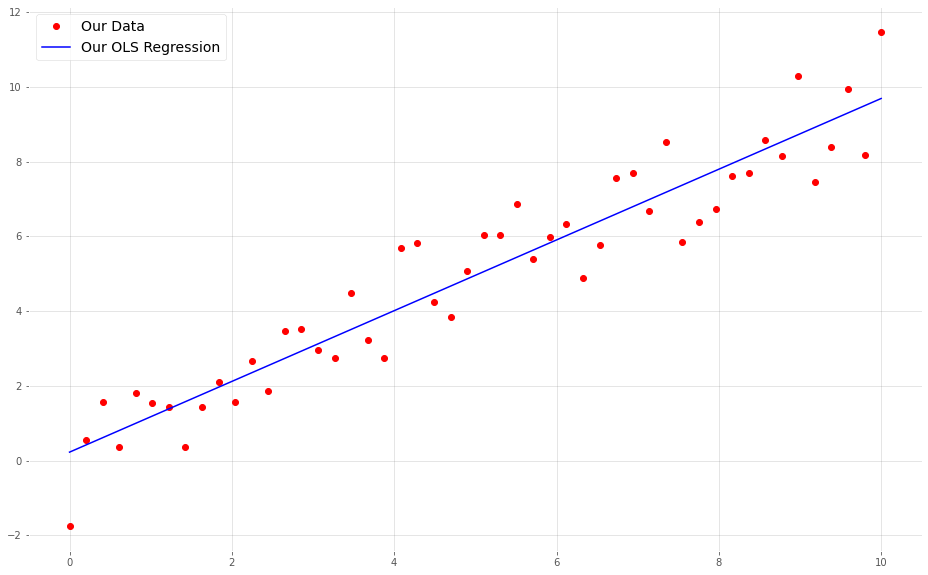

In [11]:
plt.figure(figsize = (16, 10))

# Actual data points
plt.plot(x, y,
         "ro",
         label = "Our Data")

# fitted regression line
plt.plot(x, np.polyval(OLS, x),
         "b",
         label = "Our OLS Regression")

plt.legend(loc = 0)

> The interval for the predictor variable x is 0–10. Enlarging that interval to 0–20 allows us to predict values for the outcome variable y beyond the domain of the original data set by an extrapolation, given the optimal regression parameters.

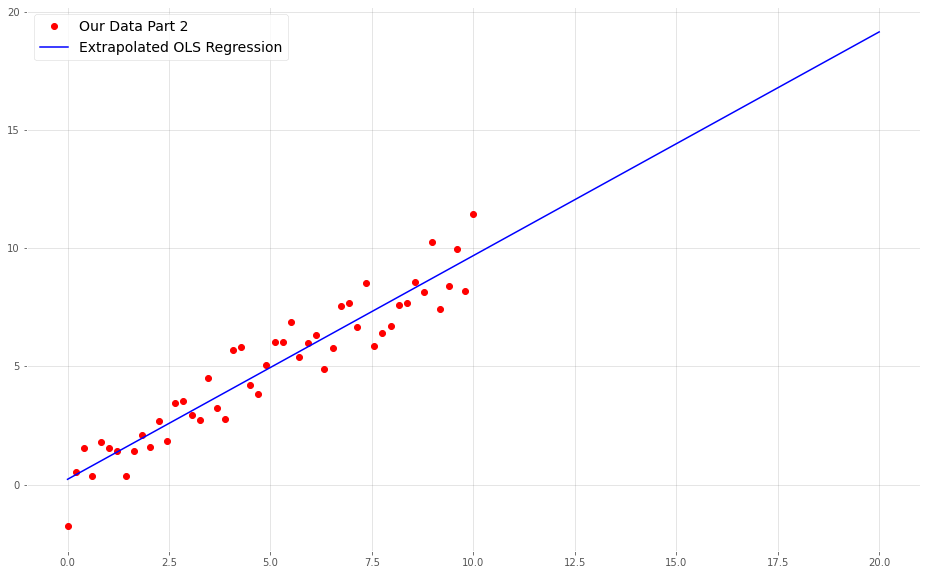

In [12]:
plt.figure(figsize = (16, 10))

plt.plot(x, y,
         "ro",
         label = "Our Data Part 2")

extrapolated_scale = np.linspace(0, 20)

plt.plot(extrapolated_scale, np.polyval(OLS, extrapolated_scale),
         "b",
         label = "Extrapolated OLS Regression")

plt.legend(loc = 0)

<a id="estimation"></a>
### Price Prediction: The basic

> Price prediction based on time series data has to deal with one special feature: the time-based ordering of the data. 

> Generally, the ordering of the data is not important for the application of linear regression. 

> In the first example in the previous section, the data on which the linear regression is implemented could have been compiled in completely different orderings, while keeping the x and y pairs constant. Independent of the ordering, the optimal regression parameters would have been the same.

    Yet, to predict tomorrow’s index level, for instance, it seems to be of paramount importance to have the historic index levels in the correct order. 
    
    If this is the case, you might want to try to predict tomorrow’s index level from the index levels of today, yesterday, the day before, and so on. 
    
    The number of days used as input are generally called lags. Using today’s index level plus those of the two previous days therefore translates into three lags.

#### Let's demonstrates this notion into a simple context.

> Please generate the numbers from 0 to 11

In [13]:
X = np.arange(12)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

> Let's assume three lags (`L`) for the regression

In [14]:
L = 3

    This means that three predictor variables for the regression and one outcome variable. That is, 0, 1, and 2 are values of the predictor variables, while 3 would be the corresponding value for the outcome variable. 
    
    Moving forward on step (in time), the values are 1, 2, and 3, as well as 4. The final combination of values is 8, 9, and 10 with 11

> Let's instantiate an ndarray object with the appropriate dimensions.

In [15]:
M = np.zeros((L + 1, len(X) - L))
M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
M[L] = X[L:]

for i in range(L):
    M[i] = X[i : i - L]

In [17]:
M.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

> In the transposed ndarray object `matrix`, the first three columns contain the values for the three independent variables. 

> They together form the matrix. 

> The fourth and final column is the vector.

> As a result, linear regression then yields the missing vector. Since there are now more independent variables, `polyfit` and `polyval` do not work any more.

> Yet, as discussed in class, nothing is impossible. There is a function in the NumPy sub-package for linear algebra (`linalg`) that allows us to solve general least-squares problems: `lstsq`.

In [18]:
OLS = np.linalg.lstsq(M[:L].T,
                      M[L],
                      rcond = None)[0]

In [19]:
OLS

array([-0.667,  0.333,  1.333])

In [20]:
np.dot(M[:L].T, OLS)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

#### That completes the warm-up. Now let’s predict real-world financial time series data.

### Index Levels Prediction

> Do you remember the extraction of EUR/USD exchange rate?

In [21]:
USD_EUR = pdr.get_data_fred("DEXUSEU",
                           start = dt.datetime(2009, 10, 1),
                           end = dt.datetime(2021, 9, 30)).dropna()
USD_EUR

,DEXUSEU
DATE,
2009-10-01,1.453
2009-10-02,1.459
2009-10-05,1.465
2009-10-06,1.474
2009-10-07,1.468
...,...
2021-09-24,1.171
2021-09-27,1.170
2021-09-28,1.168


In [22]:
USD_EUR.rename(columns = {"DEXUSEU":"PRICE"},
               inplace = True)

In [26]:
LAGS = 5

COLS = []

for LAG in range(1, LAGS + 1):
    COL = f"LAG_{LAG}"
    USD_EUR[COL] = USD_EUR["PRICE"].shift(LAG)
    COLS.append(COL)
    
USD_EUR.dropna(inplace = True)

In [27]:
USD_EUR

,PRICE,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5
DATE,,,,,,
2009-10-16,1.489,1.494,1.490,1.484,1.472,1.478
2009-10-19,1.495,1.489,1.494,1.490,1.484,1.472
2009-10-20,1.490,1.495,1.489,1.494,1.490,1.484
2009-10-21,1.501,1.490,1.495,1.489,1.494,1.490
2009-10-22,1.500,1.501,1.490,1.495,1.489,1.494
...,...,...,...,...,...,...
2021-09-24,1.171,1.173,1.174,1.172,1.173,1.173
2021-09-27,1.170,1.171,1.173,1.174,1.172,1.173
2021-09-28,1.168,1.170,1.171,1.173,1.174,1.172


In [28]:
# np.linalg.lstsq: Return the least-squares solution to a linear matrix equation.
OLS = np.linalg.lstsq(USD_EUR[COLS],
                      USD_EUR["PRICE"],
                      rcond = None
                     )[0]
OLS

array([ 1.017e+00, -2.062e-02, -4.573e-04, -1.533e-02,  1.914e-02])

In [29]:
USD_EUR["PREDICTION"] = np.dot(USD_EUR[COLS],
                               OLS)

<AxesSubplot:xlabel='DATE'>

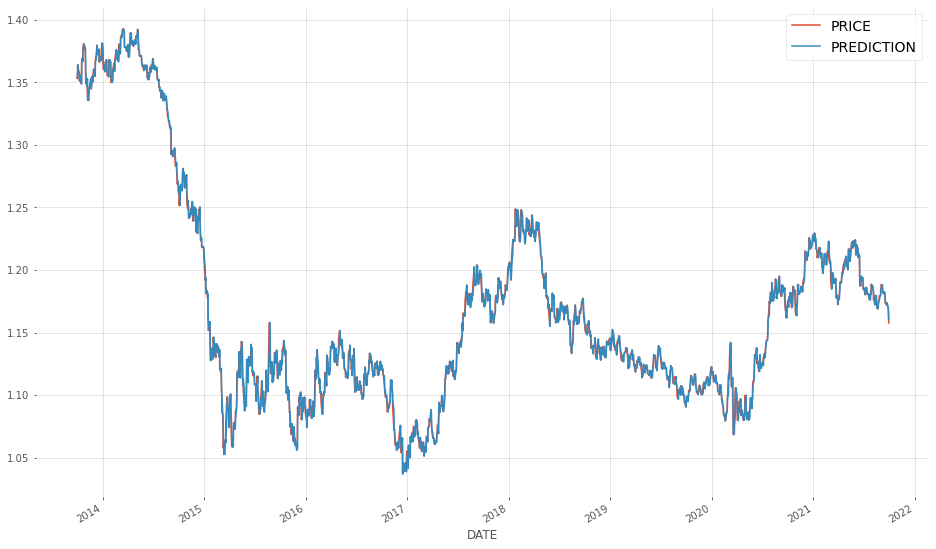

In [30]:
# USD_EUR[["PRICE", "PREDICTION"]].plot(figsize = (16, 10))
USD_EUR[["PRICE", "PREDICTION"]].loc["2013-10-1":].plot(figsize = (16, 10))

### Future Returns Prediction

> Up to now, the analysis was based on absolute rate levels. But (log) returns might be a better choice for such statistical applications. This is because of their characteristic of making the time series data stationary.

> This time, it is not only today’s return that is relevant if we are to predict tomorrow’s return; the regression results are also completely different in nature.

In [31]:
USD_EUR["RETURN"] = np.log(USD_EUR["PRICE"] / USD_EUR["PRICE"].shift(1))

In [32]:
USD_EUR.dropna(inplace = True)

In [33]:
cols = []

for lag in range(1, LAGS + 1):
    col = f"lag_{lag}"
    USD_EUR[col] = USD_EUR["RETURN"].shift(lag)
    cols.append(col)

USD_EUR.dropna(inplace = True)

#### A Quick Discussion on  `f-strings`

In [34]:
my_precious = ["a",
               "b",
               "c",
               "d",
               "e",
               "f"]

tickers = ["AAPL",
           "FB",
           "GS",
           "JPM",
           "NFLX",
           "AMZN"]

random_classmates = random.choice(my_precious)
random_tickers = random.choice(tickers)

print(f"I'd like to buy {random_tickers} with {random_classmates}.")

I'd like to buy JPM with b.


In [41]:
OLS = np.linalg.lstsq(USD_EUR[cols],
                      USD_EUR["RETURN"],
                      rcond = None)[0]
OLS

array([ 0.021, -0.003, -0.006, -0.017, -0.006])

In [42]:
USD_EUR["PREDICTION"] = np.dot(USD_EUR[cols], OLS)
USD_EUR

,PRICE,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5,PREDICTION,RETURN,lag_1,lag_2,lag_3,lag_4,lag_5
DATE,,,,,,,,,,,,,
2009-10-26,1.494,1.503,1.500,1.501,1.490,1.495,0.000,-0.006,0.002,-0.000,0.007,-0.003,0.004
2009-10-27,1.482,1.494,1.503,1.500,1.501,1.490,-0.000,-0.008,-0.006,0.002,-0.000,0.007,-0.003
2009-10-28,1.476,1.482,1.494,1.503,1.500,1.501,-0.000,-0.004,-0.008,-0.006,0.002,-0.000,0.007
2009-10-29,1.482,1.476,1.482,1.494,1.503,1.500,-0.000,0.004,-0.004,-0.008,-0.006,0.002,-0.000
2009-10-30,1.476,1.482,1.476,1.482,1.494,1.503,0.000,-0.004,0.004,-0.004,-0.008,-0.006,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,1.171,1.173,1.174,1.172,1.173,1.173,0.000,-0.002,-0.000,0.001,-0.000,-0.000,-0.003
2021-09-27,1.170,1.171,1.173,1.174,1.172,1.173,-0.000,-0.001,-0.002,-0.000,0.001,-0.000,-0.000
2021-09-28,1.168,1.170,1.171,1.173,1.174,1.172,-0.000,-0.002,-0.001,-0.002,-0.000,0.001,-0.000


<AxesSubplot:xlabel='DATE'>

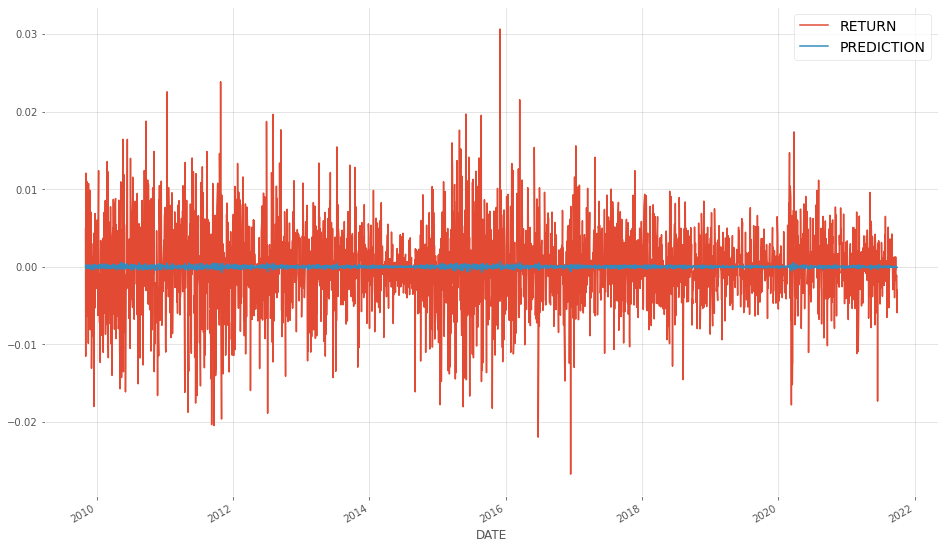

In [43]:
USD_EUR[["RETURN", "PREDICTION"]].iloc[LAGS:].plot(figsize = (16, 10))

In [44]:
HIT = np.sign(USD_EUR["RETURN"] *
              USD_EUR['PREDICTION']
             ).value_counts()
HIT

1.000     1511
-1.000    1449
0.000       26
dtype: int64

    Here, the prediction is __1511__ times correct and __1449__ wrong, which translates into a hit ratio of about __50.6___ %, or almost exactly ___50__ %.

In [45]:
HIT.values[0] / sum(HIT)

0.5060281312793035

<a id="classification"></a>
### Future Market Direction Prediction

> One question is, can the hit ratio be improved by directly implementing the linear regression based on the sign of the log returns that serve as the dependent variable values? 

> In theory, at least, this simplifies the problem from predicting an absolute return value to predicting the sign of the return value.

In [46]:
OLS = np.linalg.lstsq(USD_EUR[cols],
                      np.sign(USD_EUR["RETURN"]),
                      rcond = None)[0]
OLS

array([-1.065, -7.506, -0.586, -7.495, -2.601])

In [47]:
USD_EUR["PREDICTION"] = np.sign(np.dot(USD_EUR[cols], OLS))

USD_EUR["PREDICTION"].value_counts()

1.000     1524
-1.000    1462
Name: PREDICTION, dtype: int64

In [48]:
HIT2 = np.sign(USD_EUR["RETURN"] * USD_EUR["PREDICTION"]).value_counts()
HIT2

-1.000    1483
1.000     1477
0.000       26
dtype: int64

In [49]:
HIT2.values[0] / sum(HIT)

0.49665103817816475

### How to Execute Vectorized Backtesting of Regression-based Strategy 

> The hit ratio alone does not tell enough about the economic potential of a trading strategy using linear regression. It is well known that the ten best and worst days in the markets for a given period of time considerably influence the overall performance of investments.

> In an ideal scenario, a long-short trader would try to benefit from both best and worst days by going long and short, respectively, on the basis of appropriate market timing indicators. 

> Within the current context, this means that the quality of the market timing matters in addition to the hit ratio. 

> Thus, the `vectorized backtesting` you learned in Week 6 can give a better picture of the value of regression for prediction.

> Note that the prediction values already reflect the market positions (long or short). Let’s see if the strategy under the current assumptions outperforms the market (ignoring, among other things, transaction costs and in-sample).

In [50]:
USD_EUR

,PRICE,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5,PREDICTION,RETURN,lag_1,lag_2,lag_3,lag_4,lag_5
DATE,,,,,,,,,,,,,
2009-10-26,1.494,1.503,1.500,1.501,1.490,1.495,1.000,-0.006,0.002,-0.000,0.007,-0.003,0.004
2009-10-27,1.482,1.494,1.503,1.500,1.501,1.490,-1.000,-0.008,-0.006,0.002,-0.000,0.007,-0.003
2009-10-28,1.476,1.482,1.494,1.503,1.500,1.501,1.000,-0.004,-0.008,-0.006,0.002,-0.000,0.007
2009-10-29,1.482,1.476,1.482,1.494,1.503,1.500,1.000,0.004,-0.004,-0.008,-0.006,0.002,-0.000
2009-10-30,1.476,1.482,1.476,1.482,1.494,1.503,1.000,-0.004,0.004,-0.004,-0.008,-0.006,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,1.171,1.173,1.174,1.172,1.173,1.173,1.000,-0.002,-0.000,0.001,-0.000,-0.000,-0.003
2021-09-27,1.170,1.171,1.173,1.174,1.172,1.173,1.000,-0.001,-0.002,-0.000,0.001,-0.000,-0.000
2021-09-28,1.168,1.170,1.171,1.173,1.174,1.172,1.000,-0.002,-0.001,-0.002,-0.000,0.001,-0.000


In [51]:
USD_EUR["STRATEGY"] = USD_EUR["PREDICTION"] * USD_EUR["RETURN"]

In [52]:
USD_EUR[["RETURN", "STRATEGY"]].sum().apply(np.exp)

RETURN     0.770
STRATEGY   0.716
dtype: float64

<AxesSubplot:xlabel='DATE'>

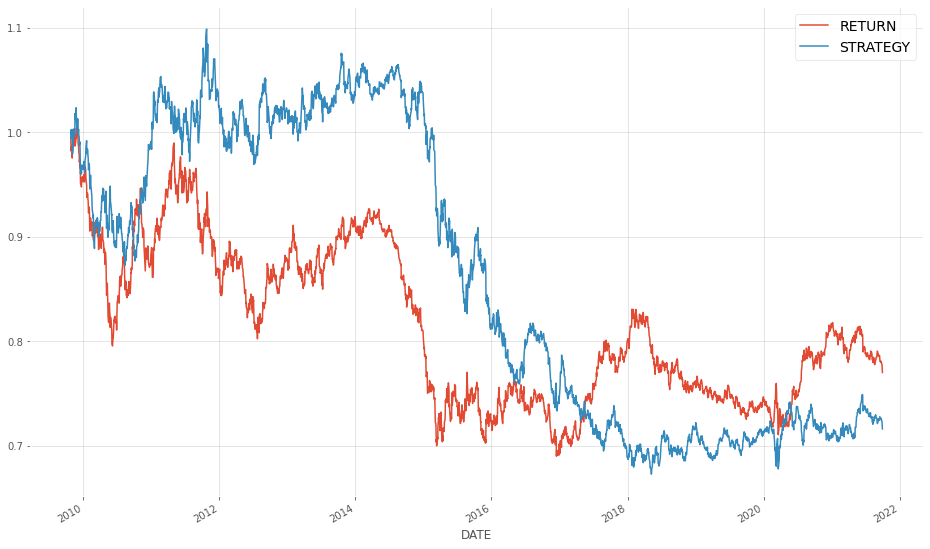

In [53]:
USD_EUR[["RETURN", "STRATEGY"]].dropna().cumsum().apply(np.exp).plot(figsize = (16, 10))

<a id="ml"></a>
### Market Movement Prediction using Machine Learning

> There are a number of Python packages in the machine learning field. The most popular one is `scikit-learn`, which is also one of the best documented and maintained packages. 

> We will first look into the API of the package based on linear regression, replicating some of the results above. 

> Then, we will use logistic regression as a classification algorithm to address the problem of predicting future market direction.

> Building on the fundamentals, let's apply logistic regression to the question of predicting market direction.

#### Let's run linear regression with scikit-learn

> Using scikit-learn for our purposes mainly consists of three steps:

    Step 1: Model selection | A model is to be picked and instantiated.
    
    Step 2: Model fitting | The model is to be fitted to the data at hand.
    
    Step 3: Prediction | Given the fitted model, the prediction is conducted.

#### Data Preparation (let's continue to use NumPy)

In [54]:
X = np.arange(12)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [55]:
L = 3

In [56]:
M = np.zeros((L +1, len(X) - L))

In [57]:
M[L] = X[L:]

for i in range(L):
    M[i] = X[i:i-L]

In [58]:
M

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

#### Welcome to the world of scikit-learn

In [52]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=1803f7c20eecce69f6093280e9948a6a41bd66a686a93183386e0948e22adc4f
  Stored in directory: /Users/xiezijun/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [59]:
from sklearn import linear_model

In [60]:
LM = linear_model.LinearRegression()
LM

LinearRegression()

In [61]:
LM.fit(M[:L].T, M[L])

LinearRegression()

In [62]:
LM.intercept_

2.0

In [63]:
LM.coef_

array([0.333, 0.333, 0.333])

In [64]:
lm = linear_model.LinearRegression(fit_intercept = False)

In [65]:
lm.fit(M[:L].T, M[L])

LinearRegression(fit_intercept=False)

In [66]:
lm.coef_

array([-0.667,  0.333,  1.333])

In [67]:
LM.predict(M[:L].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [68]:
lm.predict(M[:L].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

### A Basic Classification Question

> In a classification question of (supervised) machine learning, it has to be decided to which of a limited set of categories (`classes`) a new observation belongs. 

> In a financial market context, predicting the price of a financial instrument can lead to a numerical result that is far off the correct one or that is quite close to it. This is an estimation problem. 

> Predicting tomorrow’s market direction, there can only be a correct or a (`entirely`) wrong result. This is a classification problem with the set of categories limited to, for example, “up” and “down” or “+1” and “–1” or “1” and “0.”

In [69]:
HOURS_of_STUDY = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25,
                  4.5, 4.75, 5., 5.5])

In [70]:
PASSING_EXAM = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                         0, 1, 1, 1, 1, 1, 1])

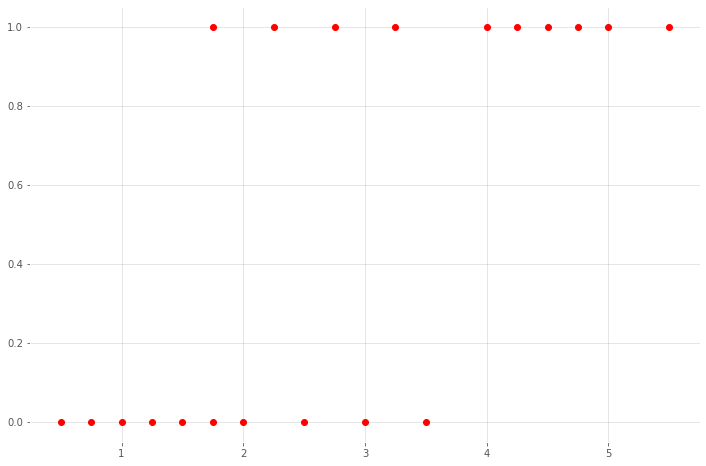

In [71]:
plt.figure(figsize = (12, 8))

plt.plot(HOURS_of_STUDY, PASSING_EXAM,
         "ro")

> Given a certain number of hours studied by a student (not in the data set), will they pass the exam or not? 

> What answer could linear regression give?

In [72]:
REGRESSION = np.polyfit(HOURS_of_STUDY,
                        PASSING_EXAM,
                        deg = 1)

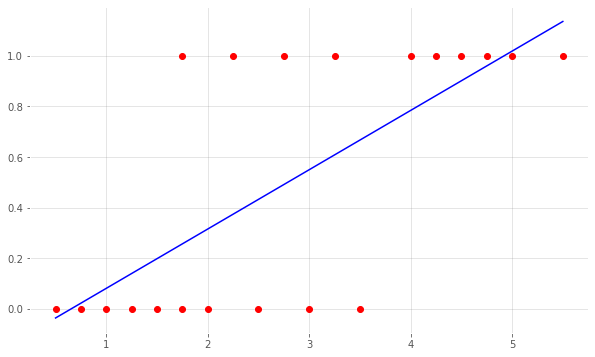

In [73]:
plt.figure(figsize = (10, 6))
plt.plot(HOURS_of_STUDY, PASSING_EXAM,
        "ro")
plt.plot(HOURS_of_STUDY, np.polyval(REGRESSION, HOURS_of_STUDY),
         "b")

> This is where classification algorithms (e.g., logistic regression; support vector machines) come into play.

solver = ["newton-cg"
          "sag"
          "saga"
          "lbfgs"]

In [77]:
GLM = linear_model.LogisticRegression(solver = "lbfgs")
GLM

LogisticRegression()

In [78]:
HOURS_of_STUDY = HOURS_of_STUDY.reshape(1, -1).T

In [79]:
GLM.fit(HOURS_of_STUDY, PASSING_EXAM)

LogisticRegression()

In [80]:
PREDICTIONS = GLM.predict(HOURS_of_STUDY)
PREDICTIONS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

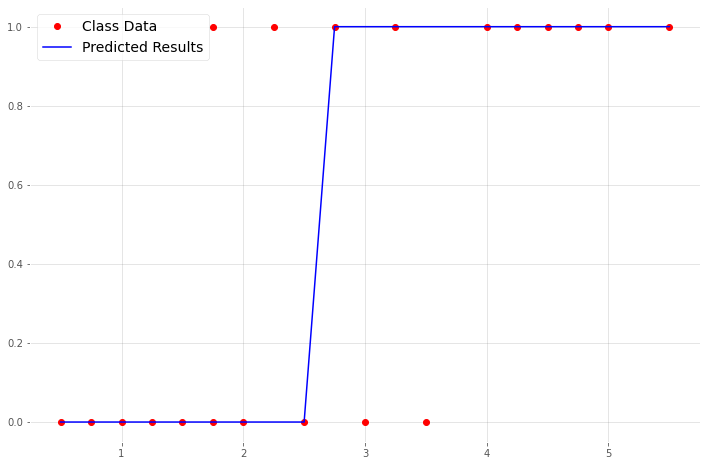

In [81]:
plt.figure(figsize = (12, 8))

plt.plot(HOURS_of_STUDY, PASSING_EXAM,
         "ro",
         label = "Class Data")

plt.plot(HOURS_of_STUDY, PREDICTIONS,
         "b",
         label = "Predicted Results")

plt.legend(loc = 0)

> Here, note that there is no guarantee that 2.75 hours or more lead to success. 

> It just means `more probable` to succeed from that many hours on than to fail. 

> Such probabilistic reasoning can also be analyzed and visualized based on the same model instance

In [83]:
PROB = GLM.predict_proba(HOURS_of_STUDY)

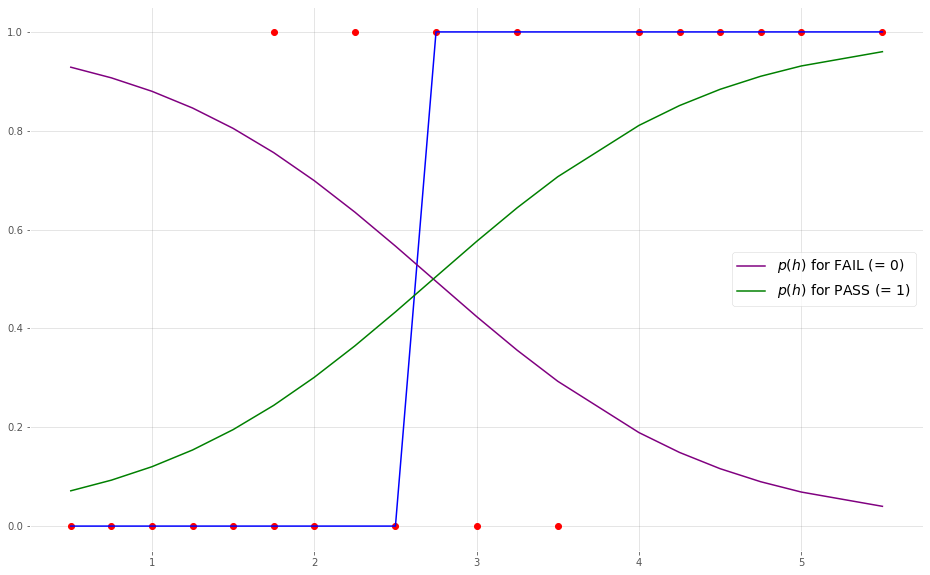

In [84]:
plt.figure(figsize = (16, 10))

plt.plot(HOURS_of_STUDY, PASSING_EXAM,
         "ro")

plt.plot(HOURS_of_STUDY, PREDICTIONS,
         "b")

plt.plot(HOURS_of_STUDY, PROB.T[0],
         "purple",
         label = "$p(h)$ for FAIL (= 0)")

plt.plot(HOURS_of_STUDY, PROB.T[1],
         "g",
         label = "$p(h)$ for PASS (= 1)")

plt.legend(loc = 0)

#### Building on the fundamentals, let's apply logistic regression to the question of predicting market direction.

> The simple classification example has a single feature only: the number of hours studied. In practice, one often has more than one feature that can be used for classification. 

> Given the prediction approach introduced in this chapter, one can identify a feature by a lag. Therefore, working with three lags from the time series data means that there are three features. 

> As possible outcomes or categories, there are only +1 and -1 for an upwards and a downwards movement, respectively. Although the wording changes, the formalism stays the same, particularly with regard to deriving the matrix, now called the feature matrix.

> Let's generate a pandas DataFrame based “feature matrix” to which the three step procedure applies equally well. The feature matrix will now be a sub-set of the columns in the original data set.

In [85]:
GOLD = pdr.get_data_yahoo("GLD",
                          start = dt.datetime(2010, 10, 1),
                          end = dt.datetime(2021, 9, 30))
GOLD

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-09-30,128.280,126.610,128.150,127.910,19213400,127.910
2010-10-01,129.070,127.910,127.910,128.910,17211900,128.910
2010-10-04,128.620,128.220,128.520,128.460,8368000,128.460
2010-10-05,131.120,129.870,130.110,130.990,17489600,130.990
2010-10-06,131.860,131.340,131.450,131.810,16142200,131.810
...,...,...,...,...,...,...
2021-09-24,164.000,162.740,163.000,163.300,6937500,163.300
2021-09-27,164.360,163.510,163.850,163.640,4943000,163.640
2021-09-28,162.820,161.730,162.730,162.050,9282800,162.050


In [86]:
GOLD["RETURN"] = np.log(GOLD["Close"] / GOLD["Close"].shift(1))

In [87]:
GOLD.dropna(inplace = True)

In [88]:
lags = 5

cols = []

for lag in range(1, lags + 1):
    col = "lag_{}".format(lag)
    GOLD[col] = GOLD["RETURN"].shift(lag)
    cols.append(col)

GOLD.dropna(inplace = True)

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
glm = linear_model.LogisticRegression(solver = "lbfgs",
                                      multi_class = "auto",
                                      max_iter = 1000,
                                      C = 1e7)

In [91]:
glm.fit(GOLD[cols],
        np.sign(GOLD["RETURN"]))

LogisticRegression(C=10000000.0, max_iter=1000)

In [97]:
GOLD["PREDICTIONS"] = glm.predict(GOLD[cols])
GOLD["PREDICTIONS"].value_counts()

1.000     2488
-1.000     273
Name: PREDICTIONS, dtype: int64

In [98]:
HITS = np.sign(GOLD["RETURN"].iloc[lags:] * GOLD["PREDICTIONS"].iloc[lags:]).value_counts()
HITS

1.000     1433
-1.000    1312
0.000       11
dtype: int64

In [99]:
accuracy_score(GOLD["PREDICTIONS"],
               np.sign(GOLD["RETURN"]))

0.5197392249185078

In [100]:
GOLD["STRATEGY"] = GOLD["PREDICTIONS"] * GOLD["RETURN"]

In [101]:
GOLD[["RETURN", "STRATEGY"]].sum().apply(np.exp)

RETURN     1.244
STRATEGY   0.901
dtype: float64

<AxesSubplot:xlabel='Date'>

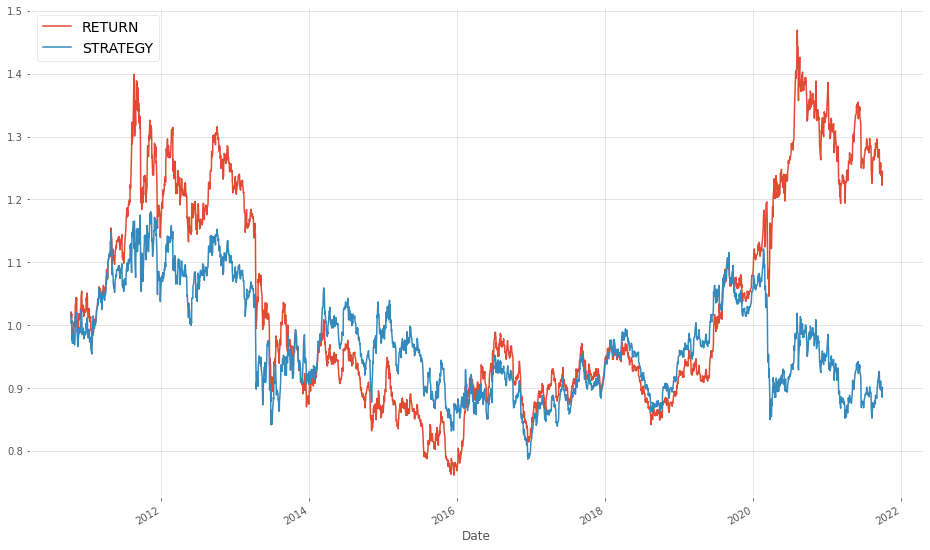

In [102]:
GOLD[["RETURN", "STRATEGY"]].cumsum().apply(np.exp).plot(figsize = (16, 10))

> Let's increase the number of lags used from three to five.

> Will it increase or decrease the hit ratio?

> What about the gross performance of the strategy (in-sample, before transaction costs)?

### What's Next 🌟

> Today, we learned the holy grail in quantitative finance: predicting future market movements. As a starting point, we were introduced to statistics and machine learning to predict the future market direction based on past returns or similar financial quantities. Some first in-sample results appear to be promising, both for estimation and classification problems. Yet, a more reliable impression is attained when evaluating such strategies as factoring in transaction costs as well as out-of-sample.

> In our next lesson, we will expand our learning to using deep learning to  predict market movements. Specifically, we will use deep neural networks to predict market direction. You will also learn how to add features to your models to develop a better predictive model.

> `Thank you for working with the script, Team 👍`